<a href="https://colab.research.google.com/github/SMMiroE/Herramientas-de-calculo-y-simulacion-de-procesos-dinamicos/blob/main/SMME_Modulo_1__Semana_6_A1Ej1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Curso Herramientas para la simulacion de Sistemas Dinamicos**

**Actividades Semana 6**

**Lenguaje Julia**  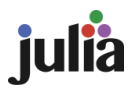
https://julialang.org/

In [ ]:
versioninfo() #setear a Runtime en Julia  https://julialang.org/learning/

Julia Version 1.10.9
Commit 5595d20a287 (2025-03-10 12:51 UTC)
Build Info:
  Official https://julialang.org/ release
Platform Info:
  OS: Linux (x86_64-linux-gnu)
  CPU: 2 × Intel(R) Xeon(R) CPU @ 2.20GHz
  WORD_SIZE: 64
  LIBM: libopenlibm
  LLVM: libLLVM-15.0.7 (ORCJIT, broadwell)
Threads: 2 default, 0 interactive, 1 GC (on 2 virtual cores)
Environment:
  LD_LIBRARY_PATH = /usr/local/nvidia/lib:/usr/local/nvidia/lib64
  JULIA_NUM_THREADS = auto


In [ ]:

using Plots

In [ ]:

using Pkg;


In [ ]:

Pkg.add("LaTeXStrings")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


In [ ]:
# @title
# Instala el kernel de Julia y librerías (ejecutar una vez por sesión)
using Pkg
Pkg.add("IJulia")
Pkg.add("Plots")
Pkg.add("GR") # GR es un backend rápido para Plots
Pkg.add("SpecialFunctions")
import Pkg
Pkg.add("PlotlyJS")

   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`
   Resolving package versions...
  No Changes to `~/.julia/environments/v1.10/Project.toml`
  No Changes to `~/.julia/environments/v1.10/Manifest.toml`


**Ejercicio 1. Sistema RLC**

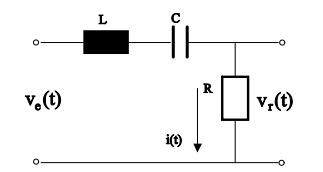

Fig. 5-1. Esquemático del circuito RLC.

Sea el sistema eléctrico de la Fig. 5-1, se requiere obtener la evolución temporal de la corriente para
diferentes tensiones de entrada.

Para el caso de asignarle valores unitarios a Ve, R, L y C, con entra entrada Heaviside unitaria se obtuvo la solución analítica como

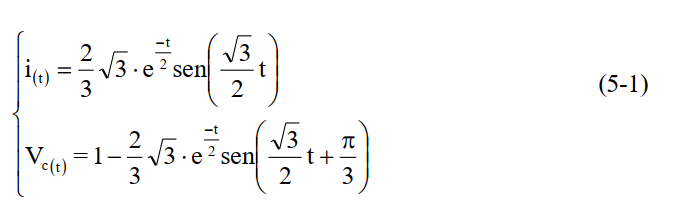

Expresión matricial

Para determinar la evolución de la corriente del circuito se pueden plantear las ecuaciones diferenciales del mismo como,

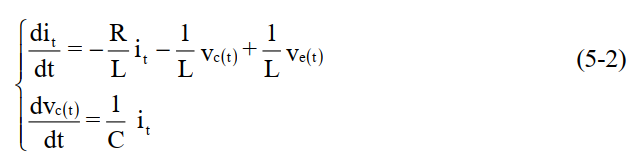

Las Ec. (5-2) se pueden expresar en una ecuación matricial-vectorial con las representaciones en variables de estado definiendo a i, vc como variables de estado y a x como vector de estado, es decir x=[ i vc]T se convierte en

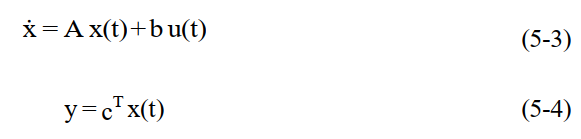

donde las matrices contienen a los coeficientes del circuito,

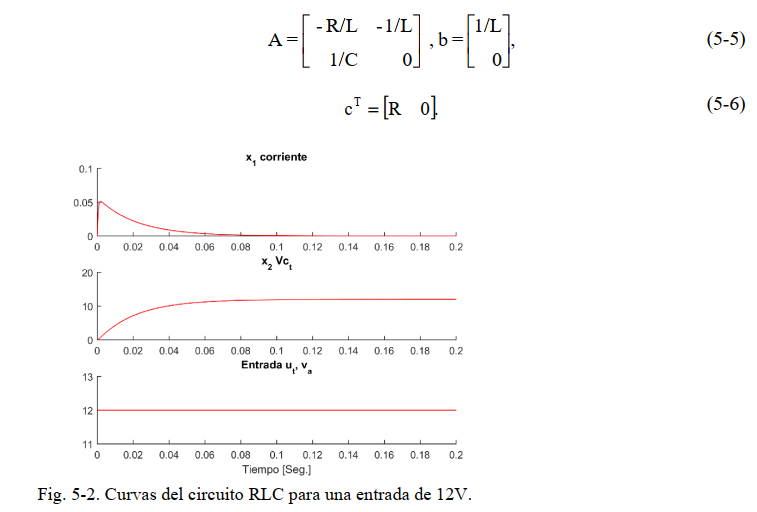

Nótese que las ecuaciones (5-1) son la solución al sistema para coeficientes específicos, en este caso, de valor unitario.

**Actividades.**

1- Asignar valores a R=1 Ohm, L=1Hy, y C=1F.


a. Empleando la solución analítica, simular 3 segundos con una entrada de tensión escalón de 12V.


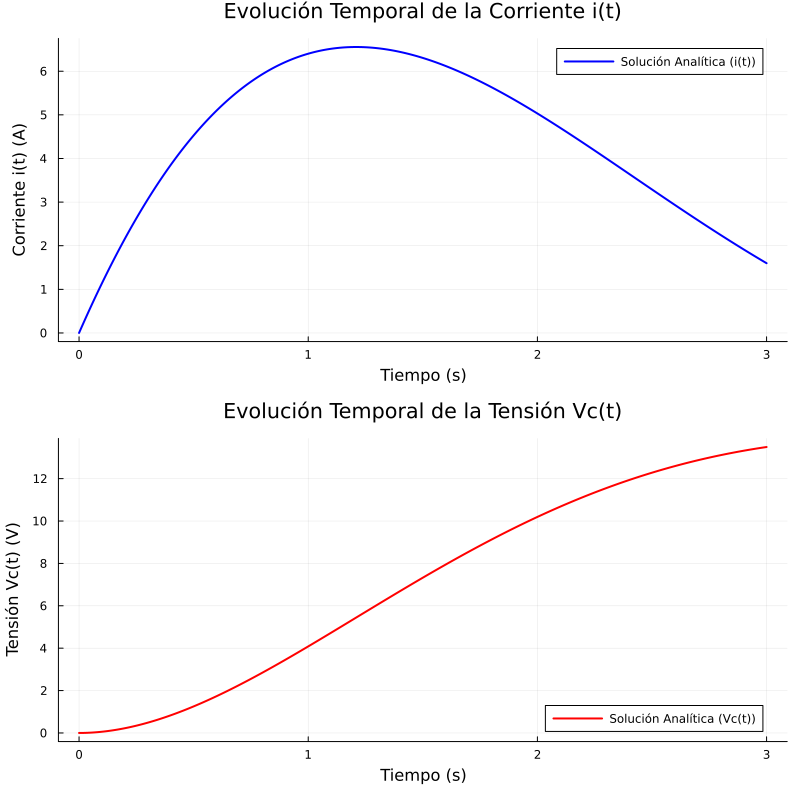

In [ ]:
# @title
using Plots
using LinearAlgebra # Para funciones como sqrt (ya está en base, pero es buena práctica)

## Parámetros del circuito
R = 1.0   # Resistencia en Ohmios
L = 1.0   # Inductancia en Henrys
C = 1.0   # Capacitancia en Faradios
Ve = 12.0 # Tensión de entrada en Volts (escalón de 12V)

# Calcular los parámetros para la solución subamortiguada
# (Dado que alpha < omega_0, el sistema es subamortiguado)
alpha = R / (2 * L)           # Coeficiente de amortiguamiento en Np/s
omega_0 = 1 / sqrt(L * C)     # Frecuencia natural no amortiguada en rad/s

# Verificamos si es subamortiguado.
if alpha >= omega_0
    println("¡Atención! El sistema no es subamortiguado con estos parámetros. La fórmula analítica podría no ser válida.")
end

omega_d = sqrt(omega_0^2 - alpha^2) # Frecuencia amortiguada en rad/s

## Definir el tiempo de simulación
t_final = 3.0       # segundos
num_points = 1000   # Número de puntos para la simulación
t = range(0.0, stop=t_final, length=num_points) # Genera un rango de números flotantes

## Solución analítica para la corriente i(t) con Ve = 12V
# Las operaciones con '.' antes de la función o el operador (como `.*`, `./`, `exp.`, `sin.`)
# indican que la operación se aplica elemento a elemento sobre vectores o rangos.
i_t_analytical = (12.0 * (2 * sqrt(3) / 3)) .* exp.(-alpha .* t) .* sin.(omega_d .* t)

## Solución analítica para la tensión en el capacitor Vc(t) con Ve = 12V
Vc_t_analytical = Ve .* (1 .- (2 * sqrt(3) / 3) .* exp.(-alpha .* t) .* sin.(omega_d .* t .+ (pi / 3)))

## Graficar los Resultados

# Crea el primer gráfico (Corriente) y lo guarda en la variable `p1`
p1 = plot(t, i_t_analytical,
          label="Solución Analítica (i(t))",
          title="Evolución Temporal de la Corriente i(t)",
          xlabel="Tiempo (s)",
          ylabel="Corriente i(t) (A)",
          color=:blue,        # Color de la línea
          linewidth=2,        # Ancho de la línea
          legend=:topright,   # Posición de la leyenda
          grid=true)          # Mostrar cuadrícula

# Crea el segundo gráfico (Tensión) y lo guarda en la variable `p2`
p2 = plot(t, Vc_t_analytical,
          label="Solución Analítica (Vc(t))",
          title="Evolución Temporal de la Tensión Vc(t)",
          xlabel="Tiempo (s)",
          ylabel="Tensión Vc(t) (V)",
          color=:red,         # Color de la línea
          linewidth=2,
          legend=:bottomright,
          grid=true)

# Combina ambos gráficos en una sola figura, uno debajo del otro (`layout=(2,1)`).
# `size=(800, 800)` ajusta el tamaño total de la figura para que ambos se vean bien.
plot(p1, p2, layout=(2,1), size=(800, 800))

b. Empleando el cálculo mediante Euler, verificar que coincida con el ítem anterior.

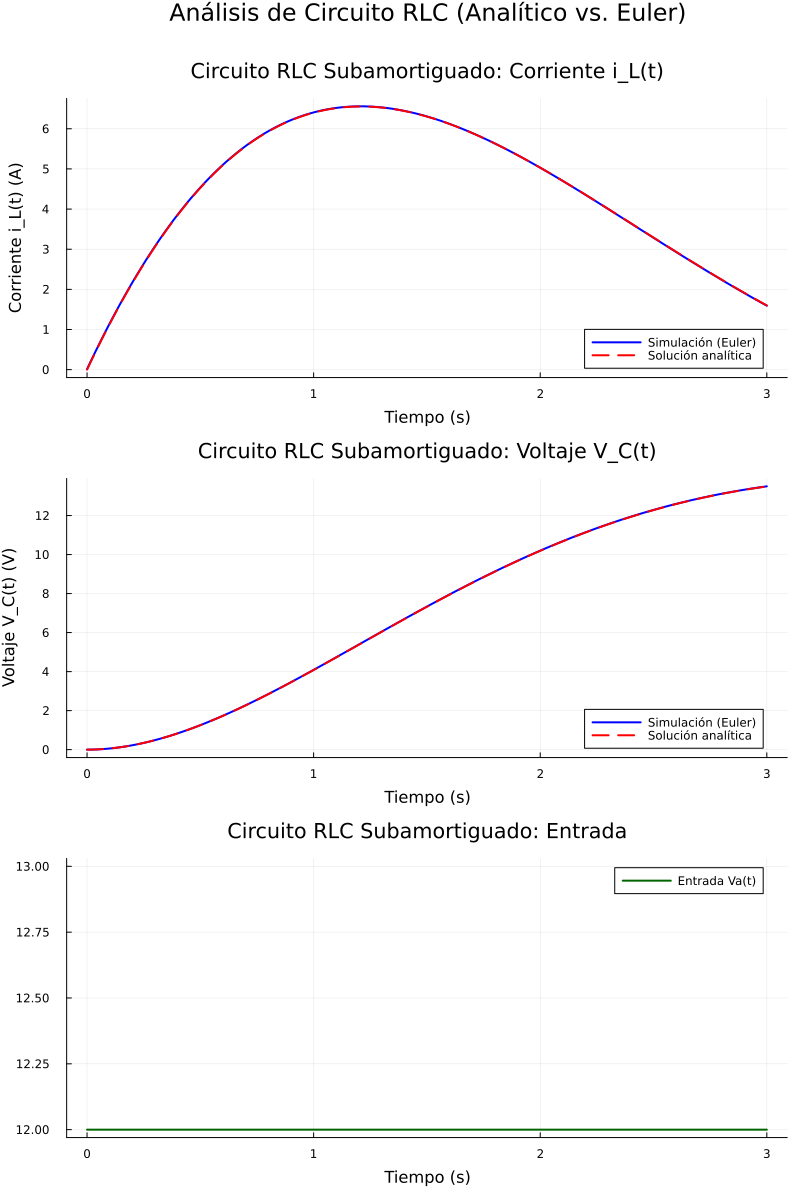

In [ ]:
# @title
using Plots # Para graficar
using LinearAlgebra # Para funciones como sqrt

## Parámetros del circuito
R = 1.0   # Ohm
L = 1.0   # H
C = 1.0   # F
h = 1e-3  # Paso de tiempo
t_simul = 3.0 # Tiempo de simulación en segundos

## Inicialización
t_euler = 0.0:h:t_simul # Rango de tiempo para Euler (Julia es inclusivo en ambos extremos)
num_points_euler = length(t_euler)

# Inicialización de vectores con ceros para almacenar resultados de Euler
# Usamos `Vector{Float64}(undef, num_points_euler)` y luego `fill!` para inicializar con ceros.
# O más directo, `zeros(Float64, num_points_euler)`.
x1_euler = zeros(Float64, num_points_euler) # Corriente i_L(t)
x2_euler = zeros(Float64, num_points_euler) # Voltaje V_C(t)
u_euler = zeros(Float64, num_points_euler)  # Entrada Va(t)

# Condiciones iniciales para Euler
x = [0.0, 0.0] # [i_L(0); V_C(0)] - Notación de vector en Julia
Va = 12.0      # Escalón de 12V

## Simulación con Euler
# El bucle en Julia es muy similar al de R o Python
for ii in 1:num_points_euler
    # Matrices del sistema (constantes, pero calculadas aquí para mantener la estructura)
    # Ecuaciones diferenciales para el sistema RLC
    di_dt = (-R/L) * x[1] - (1/L) * x[2] + (1/L) * Va # Ecuación para di/dt
    dvc_dt = (1/C) * x[1]                            # Ecuación para dVc/dt

    # Método de Euler (Actualización de las variables de estado)
    x[1] = x[1] + di_dt * h # Actualiza la corriente
    x[2] = x[2] + dvc_dt * h # Actualiza el voltaje en C

    # Almacena los resultados para la iteración actual
    x1_euler[ii] = x[1] # Almacena corriente
    x2_euler[ii] = x[2] # Almacena voltaje en C
    u_euler[ii] = Va    # Almacena entrada (constante)
end

## Solución analítica (subamortiguada)
# Para la solución analítica, vamos a generar un rango de tiempo quizás un poco más denso
# o el mismo que Euler para comparar directamente.
t_analitica = range(0.0, stop=t_simul, length=num_points_euler)

alpha = R / (2 * L) # Coeficiente de amortiguamiento (0.5 Np/s)
omega_0 = 1 / sqrt(L * C) # Frecuencia natural no amortiguada (1 rad/s)
omega_d = omega_0 * sqrt(1 - (alpha / omega_0)^2) # Frecuencia amortiguada (√3/2 rad/s)

# Corriente i(t) analítica
# Usamos el operador `.` para aplicar las operaciones elemento a elemento a `t_analitica`
i_analitico = 12.0 .* (2 * sqrt(3) / 3) .* exp.(-alpha .* t_analitica) .* sin.(omega_d .* t_analitica)

# Voltaje V_C(t) analítico
Vc_analitico = 12.0 .* (1 .- (2 * sqrt(3) / 3) .* exp.(-alpha .* t_analitica) .* sin.(omega_d .* t_analitica .+ (pi / 3)))

## Gráficos

# Gráfico de Corriente i_L(t)
plot_i = plot(t_euler, x1_euler,
              label="Simulación (Euler)",
              title="Circuito RLC Subamortiguado: Corriente i_L(t)",
              xlabel="Tiempo (s)",
              ylabel="Corriente i_L(t) (A)",
              color=:blue,
              linewidth=2,
              legend=:bottomright, # Posición de la leyenda más visible
              grid=true)

plot!(plot_i, t_analitica, i_analitico,
      label="Solución analítica",
      color=:red,
      linestyle=:dash, # Para línea discontinua
      linewidth=2)

# Gráfico de Voltaje V_C(t)
plot_vc = plot(t_euler, x2_euler,
               label="Simulación (Euler)",
               title="Circuito RLC Subamortiguado: Voltaje V_C(t)",
               xlabel="Tiempo (s)",
               ylabel="Voltaje V_C(t) (V)",
               color=:blue,
               linewidth=2,
               legend=:bottomright, # Posición de la leyenda más visible
               grid=true)

plot!(plot_vc, t_analitica, Vc_analitico,
      label="Solución analítica",
      color=:red,
      linestyle=:dash,
      linewidth=2)

# Gráfico de Entrada Va(t)
plot_u = plot(t_euler, u_euler,
              label="Entrada Va(t)",
              title="Circuito RLC Subamortiguado: Entrada",
              xlabel="Tiempo (s)",
              ylabel="Entrada Va(t) (V)",
              color=:darkgreen,
              linewidth=2,
              legend=:topright,
              grid=true)

# Combina todos los gráficos en una sola figura (apilados verticalmente)
plot(plot_i, plot_vc, plot_u,
     layout=(3,1), # 3 filas, 1 columna
     size=(800, 1200), # Ajusta el tamaño total para que se vean bien
     plot_title="Análisis de Circuito RLC (Analítico vs. Euler)")

Se observa que la simulacion con el metodo de Euler coincide con la solucion analitica, tanto para la corriente i(t) como para el voltaje vc(t), durante el tiempo de simulacion, con los valores unitarios de R, L y C y una entrada Ve= 12 V